# Customer Churn Analysis Project

## Problem statement 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings 
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#checking dimension of dataframe
df.shape

(7043, 21)

we have  rowsa and 21 columns in our dataframe

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
#find how the data was stored in dataframe by using head function
#head fuction shows first 5 rows of dataframes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

[SeniorCitizen,tenure] are int64 dtype and MonthlyCharges is float64 dtype and remaining columns are object dtype in give dataframe

In [7]:
#it gives full infomation of data farme that no.of columns and names no.of rows and rangeindex, non-null values count of each column and dtypes and dtypes count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here we have a range index of dataframes starts with 0 and ends with 7042, total rows are 7043 and total 21 columns and in all columns we have 7043 non-null values and dtypes are float64 in one columns and int64 in 2 columns and object in18 coulumn

In [8]:
#checking outliers in the dataframes
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no nullvalues are present in dataframe

<AxesSubplot:>

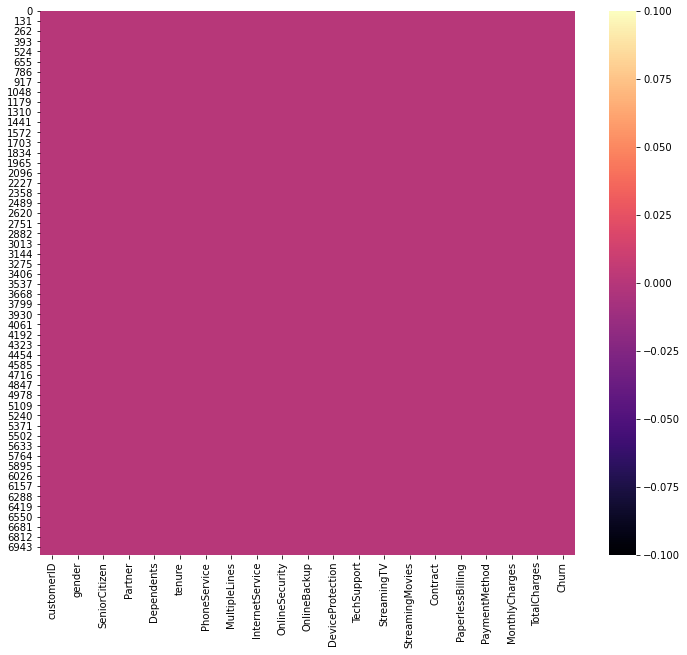

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cmap='magma')

we got no differnce in color in the plot if we have null values there will be some different shade to show that null vlaues present in that place 

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


here we got only 3 columns of data describe because rest of the columns are object type. observe these 3 columns and then we go next step
1.here SeniorCitizen column has only 2 values 0 and 1 only 
2.in tenure column, mean is more than median 

<AxesSubplot:xlabel='tenure'>

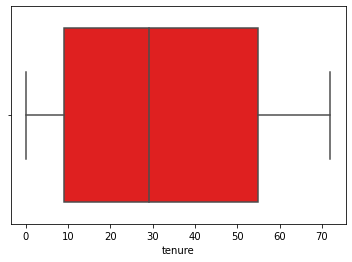

In [11]:
sns.boxplot(df['tenure'],color='red')

box plot indicate no outliers in tenure column

<AxesSubplot:xlabel='MonthlyCharges'>

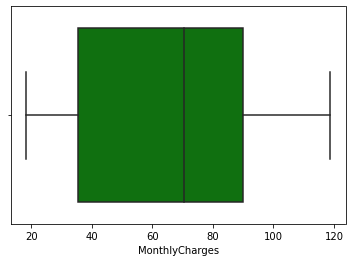

In [12]:
sns.boxplot(df['MonthlyCharges'],color='green')

above plot shows there is no outliers in Monthlycharges column

### Features

Male      3555
Female    3488
Name: gender, dtype: int64

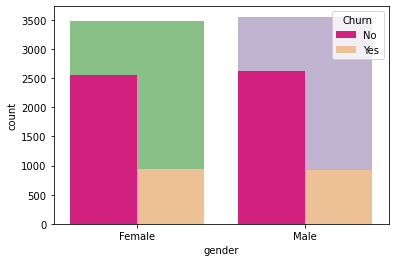

In [13]:
sns.countplot(df['gender'],palette='Accent')
sns.countplot(df['gender'],hue=df['Churn'],palette='Accent_r')
df['gender'].value_counts()

we have almost equal in gender and comparing with Churn almost same for both female and male 

In [14]:
df['gender']=df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [15]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

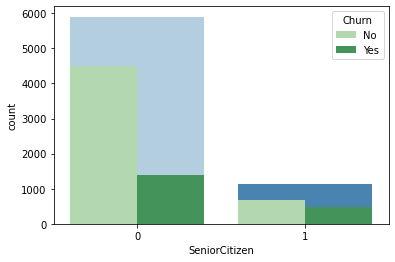

In [16]:
sns.countplot(df['SeniorCitizen'],palette='Blues')
sns.countplot(df['SeniorCitizen'],hue=df['Churn'],palette='Greens')

above plot shows less SeniorCitizen 

In [17]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

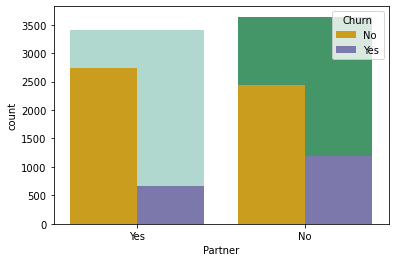

In [19]:
sns.countplot(df['Partner'],palette='BuGn')
sns.countplot(df['Partner'],hue=df['Churn'],palette='Dark2_r')

as we see about business, we generally look that having Partners or not, here almost we have equal that some had Partner and some are not 

In [20]:
df['Partner']=df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

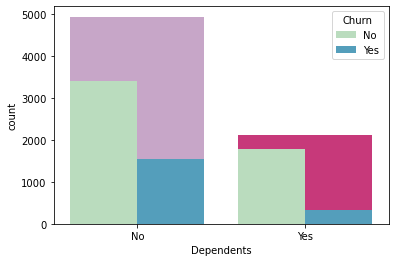

In [22]:
sns.countplot(df['Dependents'],palette='PuRd')
sns.countplot(df['Dependents'],hue=df['Churn'],palette='GnBu')

it is all about the business so one of the most important aspect that business owners have Dependents are not, here we have most records with no dependents

In [23]:
df['Dependents']=df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

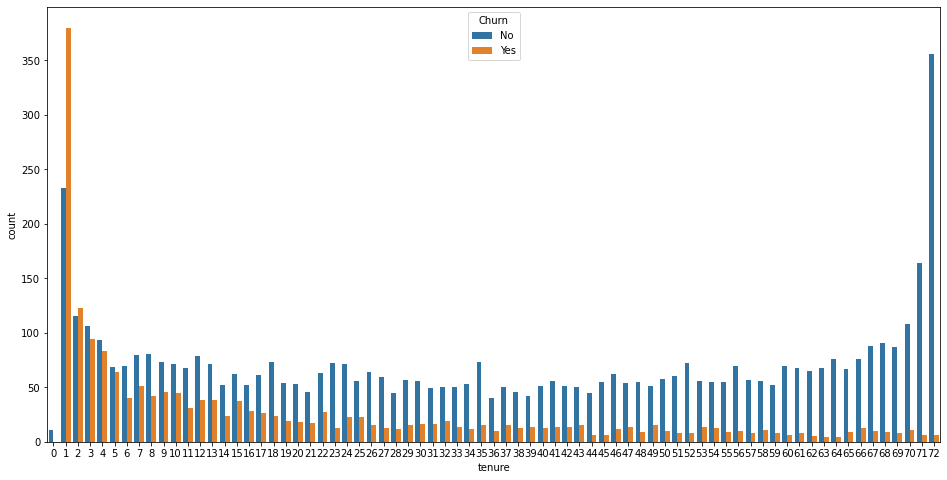

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [26]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [27]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

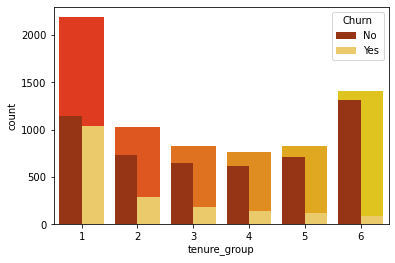

In [28]:
sns.countplot(df["tenure_group"],palette='autumn')
sns.countplot(x="tenure_group", hue="Churn", data=df,palette='afmhot')

In [29]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

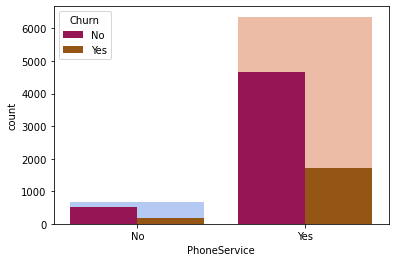

In [30]:
sns.countplot(df['PhoneService'],palette='coolwarm')
sns.countplot(df['PhoneService'],hue=df['Churn'],palette='brg')

almost every business has phone service

In [31]:
df['PhoneService']=df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

In [32]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

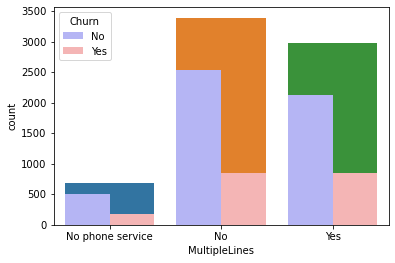

In [33]:
sns.countplot(df['MultipleLines'])
sns.countplot(df['MultipleLines'],hue=df['Churn'],palette='bwr')
df['MultipleLines'].value_counts()

MultipleLines is about having multiple phone lines or not but most of the business have no multiple lines

In [34]:
df['MultipleLines']=df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

In [35]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

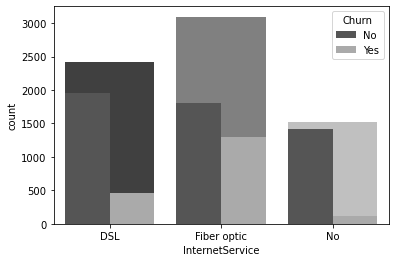

In [36]:
sns.countplot(df['InternetService'],palette='gist_gray')
sns.countplot(df['InternetService'],hue=df['Churn'],palette='gist_gray')
df['InternetService'].value_counts()

most of the companies have internet sevice and two different types DSL AND Fiber optic but hear we have most companies had fiber optic 

In [37]:
df["InternetService"] = df["InternetService"].map({'No':0, 'DSL':1, 'Fiber optic':2})

In [38]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

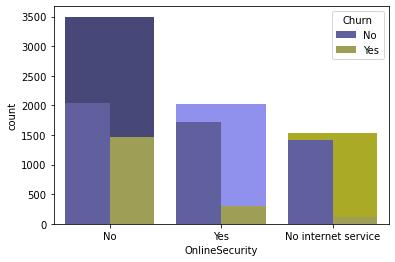

In [39]:
sns.countplot(df['OnlineSecurity'],palette='gist_stern')
sns.countplot(df['OnlineSecurity'],hue=df['Churn'],palette='gist_stern')
df['OnlineSecurity'].value_counts()

every business most have online security that they have to maintain but most of the services has no security services 

In [40]:
df['OnlineSecurity']=df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

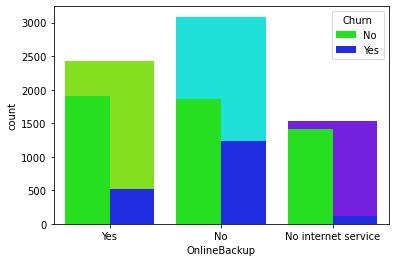

In [42]:
sns.countplot(df['OnlineBackup'],palette='hsv')
sns.countplot(df['OnlineBackup'],hue=df['Churn'],palette='hsv')
df['OnlineBackup'].value_counts()

if we maintain online services we must have backup but some has no backup and some had no internet sevice so most off the records have no service so no question of backup for those

In [43]:
df['OnlineBackup']=df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)

In [44]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

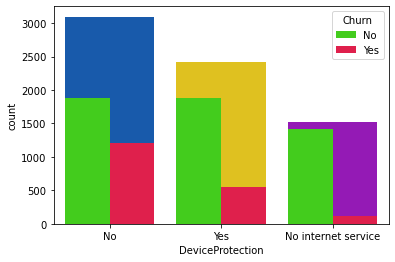

In [45]:
sns.countplot(df['DeviceProtection'],palette='prism')
sns.countplot(df['DeviceProtection'],hue=df['Churn'],palette='prism')
df['DeviceProtection'].value_counts()

we we have internet service so it has to take care of DeviceProtection to not hack by any other persons

In [46]:
df['DeviceProtection']=df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)

In [47]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

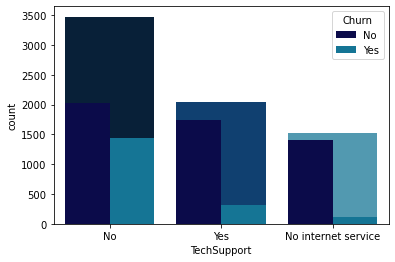

In [48]:
sns.countplot(df['TechSupport'],palette='ocean')
sns.countplot(df['TechSupport'],hue=df['Churn'],palette='ocean')
df['TechSupport'].value_counts()

if we use internet services that means we have to use some technology to handle operations so for that we need to maintain proper support system

In [49]:
df['TechSupport']=df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

In [50]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

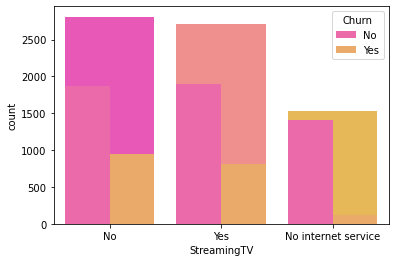

In [51]:
sns.countplot(df['StreamingTV'],palette='spring')
sns.countplot(df['StreamingTV'],palette='spring',hue=df['Churn'])
df['StreamingTV'].value_counts()

In [52]:
df['StreamingTV']=df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)

In [53]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

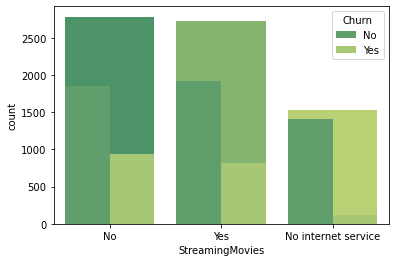

In [54]:
sns.countplot(df['StreamingMovies'],palette='summer')
sns.countplot(df['StreamingMovies'],hue=df['Churn'],palette='summer')
df['StreamingMovies'].value_counts()

In [55]:
df['StreamingMovies']=df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

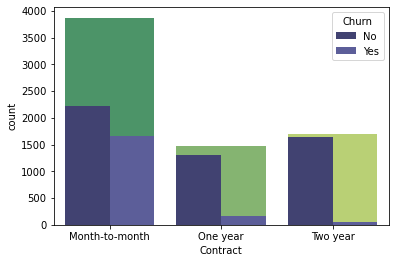

In [57]:
sns.countplot(df['Contract'],palette='summer')
sns.countplot(df['Contract'],hue=df['Churn'],palette='tab20b')
df['Contract'].value_counts()

In [58]:
df['Contract']=df['Contract'].apply(lambda x: 1 if x == 'Yes' else 0)

In [59]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

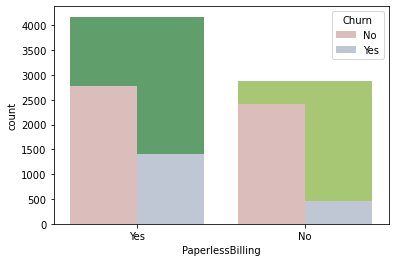

In [60]:
sns.countplot(df['PaperlessBilling'],palette='summer')
sns.countplot(df['PaperlessBilling'],hue=df['Churn'],palette='vlag_r')
df['PaperlessBilling'].value_counts()

In [61]:
df['PaperlessBilling']=df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [62]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

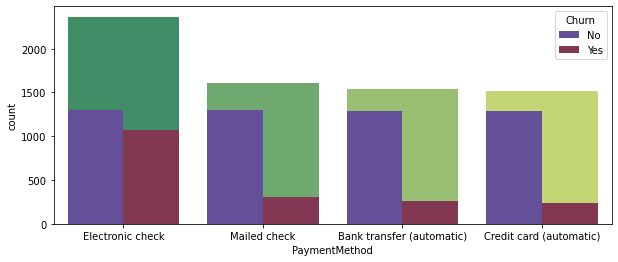

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(df['PaymentMethod'],palette='summer')
sns.countplot(df['PaymentMethod'],hue=df['Churn'],palette='twilight')
df['PaymentMethod'].value_counts()

In [64]:
df["PaymentMethod"] = df["PaymentMethod"].map({'Electronic check':0, 'Mailed check':1, 
                                               'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [65]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [66]:
df['TotalCharges'] =pd.to_numeric(df["TotalCharges"],errors='coerce')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

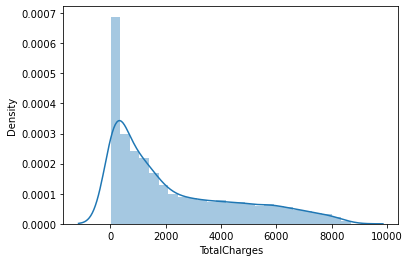

In [67]:
sns.distplot(df['TotalCharges'])

TotalCharges column has skewed data and it has outliers also

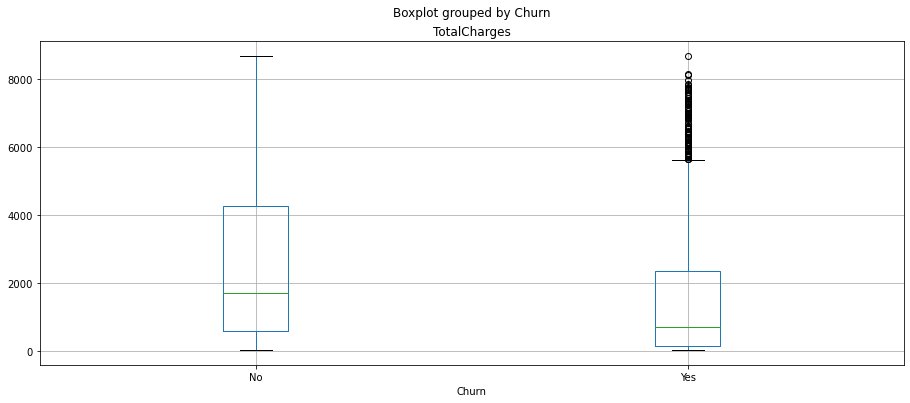

In [68]:
boxplot = df.boxplot(figsize=(15,6), column=['TotalCharges'], by="Churn")

In [69]:
uppper_boundary=df['TotalCharges'].mean() + 1.5* df['TotalCharges'].std()
lower_boundary=df['TotalCharges'].mean() - 1.5*df['TotalCharges'].std()
print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

lower_boundary: -1116.8566019828481
uppper_boundary 5683.457483666587


(None, None)

In [70]:
min(df['TotalCharges']),max(df['TotalCharges'])

(18.8, 8684.8)

In [71]:
df.loc[df['TotalCharges']>5683.46,'TotalCharges']=5683.46

In [72]:
df['TotalCharges'].isnull().sum()

11

In [73]:
df=df.dropna(axis = 0, how ='any')

<AxesSubplot:xlabel='Churn', ylabel='count'>

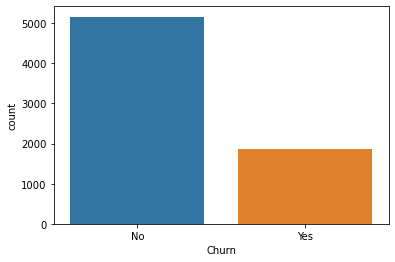

In [74]:
sns.countplot(df['Churn'])

we have imblance data

In [75]:
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [76]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,1,56.95,1889.50,0,3
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,0,0,2,42.30,1840.75,0,4
4,9237-HQITU,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,0,1,1,1,1,0,1,1,84.80,1990.50,0,2
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,1,1,0,1,1,0,1,3,103.20,5683.46,0,6
7040,4801-JZAZL,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0,1
7041,8361-LTMKD,0,0,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1,1


In [77]:
df=df.drop(['customerID','tenure'],axis=1)

In [78]:
df.shape

(7032, 20)

<AxesSubplot:>

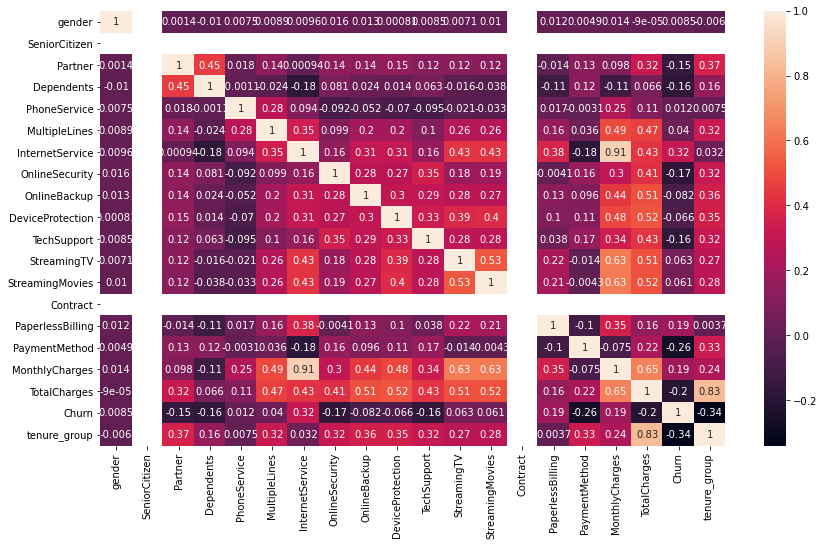

In [79]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [80]:
df=df.drop(['SeniorCitizen','Contract'],axis=1)

In [81]:
df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,29.85,29.85,0,1
1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,56.95,1889.50,0,3
2,0,0,0,1,0,1,1,1,0,0,0,0,1,1,53.85,108.15,1,1
3,0,0,0,0,0,1,1,0,1,1,0,0,0,2,42.30,1840.75,0,4
4,1,0,0,1,0,2,0,0,0,0,0,0,1,0,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,2
7039,1,1,1,1,1,2,0,1,1,0,1,1,1,3,103.20,5683.46,0,6
7040,1,1,1,0,0,1,1,0,0,0,0,0,1,0,29.60,346.45,0,1
7041,0,1,0,1,1,2,0,0,0,0,0,0,1,1,74.40,306.60,1,1


### dividing traget and features

In [82]:
x=df.drop('Churn',axis=1)
y=df['Churn']

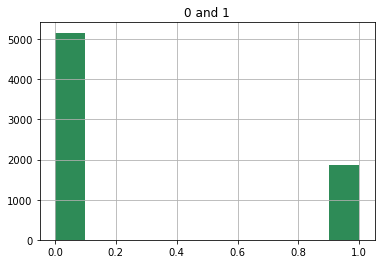

0    5163
1    1869
Name: Churn, dtype: int64

In [83]:
y.hist(grid=True,color='seagreen')
plt.title("0 and 1")
plt.show()
y.value_counts()

###  Resampling

In [84]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_res,y_res=us.fit_resample(x,y)

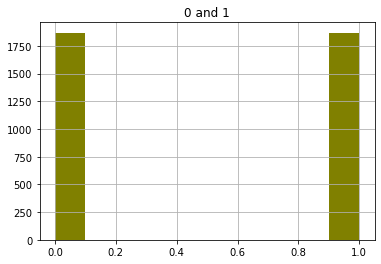

In [85]:
y_res.hist(grid=True,color='olive')
plt.title("0 and 1")
plt.show()

resampled the dataframe to balance the data

##  train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=50)

In [87]:
x_train.shape

(2616, 17)

In [88]:
x_test.shape

(1122, 17)

In [89]:
y_train.shape

(2616,)

In [90]:
y_test.shape

(1122,)

## applying Machine Learning Algorithms

In [91]:
model=[LogisticRegression(),DecisionTreeClassifier(),
       RandomForestClassifier(),SVC(),AdaBoostClassifier(),
       GradientBoostingClassifier(),KNeighborsClassifier() ]

In [93]:
for m in model:
    print('model name:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,m.predict(x_test)))
    print()
    print("Cross validation score:")
    scr=cross_val_score(m,x,y,cv=5)
    print('cross validation score',scr.mean())
    print('------------------------------------------------------------------------------')

model name: LogisticRegression()
accuracy score: 0.749554367201426
confusion matrix: [[411 145]
 [136 430]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.74      0.75       556
           1       0.75      0.76      0.75       566

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122

roc_auc_score: 0.7494629737905789

Cross validation score:
cross validation score 0.7976374983444898
------------------------------------------------------------------------------
model name: DecisionTreeClassifier()
accuracy score: 0.6506238859180036
confusion matrix: [[365 191]
 [201 365]]
classification report:               precision    recall  f1-score   support

           0       0.64      0.66      0.65       556
           1       0.66      0.64      0.65       566

    accuracy                           0.65      1122
   macro

after applying different Machine Learning Algorithms we can conclude AdaBoostClassifier is our best algorithm

## Hyper Parameter Tuning 

In [98]:
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[2,3,4],
              'n_estimators':[100,200,300,400,500],
              'learning_rate':[0.01,0.1,1]}

gcv = GridSearchCV(ABC, parameters,verbose=3,scoring='f1',n_jobs=-1)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [2, 3, 4],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=3)

In [99]:
gcv.best_params_

{'base_estimator__max_depth': 2,
 'base_estimator__min_samples_leaf': 2,
 'learning_rate': 0.01,
 'n_estimators': 300}

In [100]:
gcv_pred=gcv.predict(x_test)

In [101]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.750445632798574
roc_auc_score: 0.7502033708722068


In [102]:
logit_roc_auc1=roc_auc_score(y_test,gcv_pred)
fpr,tpr,thresholds=roc_curve(y_test,gcv.predict_proba(x_test)[:,1])

In [103]:
fpr

array([0.        , 0.00359712, 0.00719424, 0.00719424, 0.00719424,
       0.00719424, 0.00719424, 0.00719424, 0.00719424, 0.00719424,
       0.00719424, 0.00719424, 0.00719424, 0.01258993, 0.01438849,
       0.01978417, 0.02158273, 0.02697842, 0.02697842, 0.03057554,
       0.03057554, 0.03057554, 0.03057554, 0.03057554, 0.03597122,
       0.03956835, 0.03956835, 0.04496403, 0.04856115, 0.05215827,
       0.05215827, 0.05395683, 0.05395683, 0.05755396, 0.05755396,
       0.05755396, 0.05755396, 0.06115108, 0.06294964, 0.06294964,
       0.06294964, 0.06834532, 0.07014388, 0.07014388, 0.07014388,
       0.07014388, 0.07014388, 0.07194245, 0.07374101, 0.07374101,
       0.07374101, 0.07553957, 0.07553957, 0.07553957, 0.07553957,
       0.07733813, 0.07733813, 0.07733813, 0.07733813, 0.07913669,
       0.08992806, 0.08992806, 0.09352518, 0.10071942, 0.10071942,
       0.10251799, 0.10251799, 0.10431655, 0.10431655, 0.10791367,
       0.10971223, 0.11330935, 0.11330935, 0.11510791, 0.11870

In [104]:
tpr

array([0.        , 0.04946996, 0.0565371 , 0.05830389, 0.06537102,
       0.07067138, 0.07243816, 0.08833922, 0.09540636, 0.09893993,
       0.10600707, 0.12190813, 0.12720848, 0.17314488, 0.17844523,
       0.19257951, 0.19434629, 0.21731449, 0.21908127, 0.21908127,
       0.22084806, 0.24028269, 0.24204947, 0.24911661, 0.26678445,
       0.2844523 , 0.29151943, 0.31448763, 0.31625442, 0.32862191,
       0.33215548, 0.33392226, 0.33745583, 0.35159011, 0.35335689,
       0.35865724, 0.36219081, 0.36219081, 0.3639576 , 0.36749117,
       0.38869258, 0.39222615, 0.39399293, 0.3975265 , 0.39929329,
       0.40282686, 0.40636042, 0.40989399, 0.4204947 , 0.42402827,
       0.42579505, 0.42932862, 0.43109541, 0.43462898, 0.43639576,
       0.43992933, 0.44699647, 0.45053004, 0.45229682, 0.45229682,
       0.48939929, 0.49646643, 0.49823322, 0.50176678, 0.50530035,
       0.50883392, 0.51060071, 0.51060071, 0.51413428, 0.51413428,
       0.51413428, 0.52826855, 0.53003534, 0.53003534, 0.53710

In [105]:
thresholds

array([1.70080632, 0.70080632, 0.69041588, 0.68522728, 0.68431701,
       0.68136168, 0.67319811, 0.67002476, 0.65908535, 0.62906777,
       0.62808325, 0.62633564, 0.62534818, 0.62489004, 0.6238969 ,
       0.62214562, 0.62145041, 0.62068946, 0.61815596, 0.61637099,
       0.61541887, 0.61313916, 0.61202582, 0.61102403, 0.60777582,
       0.60629933, 0.60523411, 0.60422613, 0.60289715, 0.602745  ,
       0.59863113, 0.59860848, 0.59433166, 0.593351  , 0.59193015,
       0.59144747, 0.59031342, 0.59001339, 0.58945339, 0.58881566,
       0.58862984, 0.58674362, 0.58593136, 0.58524198, 0.58460182,
       0.58448403, 0.58285809, 0.58183245, 0.58145753, 0.58032573,
       0.57752709, 0.57651285, 0.57491177, 0.57416565, 0.57377833,
       0.57313428, 0.5716193 , 0.5707791 , 0.57043775, 0.57037028,
       0.56947819, 0.56852881, 0.56831017, 0.56796001, 0.56682309,
       0.566791  , 0.56666813, 0.56598756, 0.56456869, 0.56255181,
       0.56202409, 0.55847922, 0.55781504, 0.55775883, 0.55759

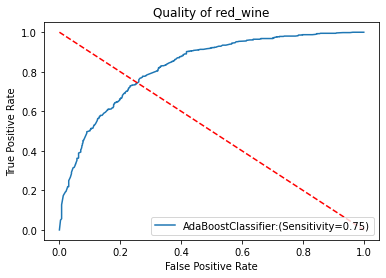

In [106]:
plt.figure()
plt.plot(fpr,tpr,label='AdaBoostClassifier:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Save the model

In [107]:
import joblib
joblib.dump(gcv,"Customer-Churn-Analysis-project.pkl")

['Customer-Churn-Analysis-project.pkl']

## Load the saved model

In [108]:
model=joblib.load('Customer-Churn-Analysis-project.pkl')

In [109]:
pred=model.predict(x_test)

In [110]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))

accuracy score: 0.750445632798574
